# Let's try a multiclass problem without transfer learning


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import MaxPool2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [33]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

r = zipfile.ZipFile("10_food_classes_all_data.zip","r")
r.extractall()
r.close()


--2023-08-20 08:21:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  19.7MB/s    in 27s     

2023-08-20 08:21:52 (18.0 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [3]:
!ls

10_food_classes_all_data  10_food_classes_all_data.zip	__MACOSX  sample_data


In [37]:
import os

for path, dir , filename in os.walk("10_food_classes_all_data"):
  print(f"{len(dir)} dir ---> {len(filename)} imgs at {path}")

2 dir ---> 0 imgs at 10_food_classes_all_data
10 dir ---> 0 imgs at 10_food_classes_all_data/train
0 dir ---> 750 imgs at 10_food_classes_all_data/train/chicken_wings
0 dir ---> 750 imgs at 10_food_classes_all_data/train/ice_cream
0 dir ---> 750 imgs at 10_food_classes_all_data/train/sushi
0 dir ---> 750 imgs at 10_food_classes_all_data/train/pizza
0 dir ---> 750 imgs at 10_food_classes_all_data/train/steak
0 dir ---> 750 imgs at 10_food_classes_all_data/train/fried_rice
0 dir ---> 750 imgs at 10_food_classes_all_data/train/chicken_curry
0 dir ---> 750 imgs at 10_food_classes_all_data/train/ramen
0 dir ---> 750 imgs at 10_food_classes_all_data/train/grilled_salmon
0 dir ---> 750 imgs at 10_food_classes_all_data/train/hamburger
10 dir ---> 0 imgs at 10_food_classes_all_data/test
0 dir ---> 250 imgs at 10_food_classes_all_data/test/chicken_wings
0 dir ---> 250 imgs at 10_food_classes_all_data/test/ice_cream
0 dir ---> 250 imgs at 10_food_classes_all_data/test/sushi
0 dir ---> 250 imgs at

In [38]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [5]:
# Extract class names
import numpy as np
class_names = np.array(sorted([j for j in os.listdir(train_dir)]))

In [7]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [59]:
import random as rd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mimg

In [7]:

def viewData(train_dir=train_dir):
  plt.figure(figsize=(5,5))
  class_names  = [j for j in os.listdir(train_dir)]
  choice = rd.randint(0, len(class_names))
  path_ = train_dir + "/" + class_names[choice]
  files =[ j for j in os.listdir(path_)]
  choice = rd.randint(0, len(files))
  path_ += "/" + files[choice]
  img = mimg.imread(path_)
  plt.title(path_, fontsize=10)
  plt.imshow(img)

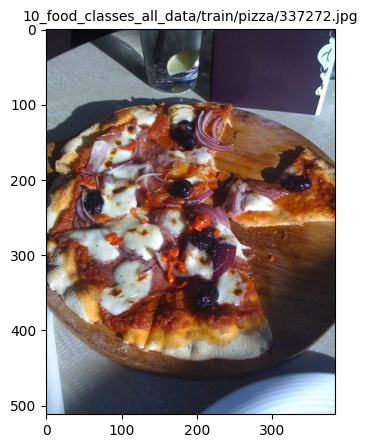

In [10]:
viewData(train_dir)

**Normalizing and shuffling the data**

In [8]:
test_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen = ImageDataGenerator(rescale=1/255.)

In [9]:
train_data = test_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              color_mode='rgb',
                                              classes=None ,
                                              shuffle=True,
                                              seed=42,
                                              class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             color_mode='rgb',
                                             classes=None,
                                             shuffle=False,
                                             seed=42,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Model Creation

In [13]:
tf.random.set_seed(42)

model1 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])


# Model Compilation

model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

# Model Fitting
history1 = model1.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data=test_data,
           validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 130ms/step - loss: 2.2630 - accuracy: 0.1455 - val_loss: 2.2355 - val_accuracy: 0.1608
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 2.1814 - accuracy: 0.1871 - val_loss: 2.1654 - val_accuracy: 0.1924
Epoch 3/5
235/235 [==============================] - 28s 119ms/step - loss: 2.1434 - accuracy: 0.1977 - val_loss: 2.1252 - val_accuracy: 0.2116
Epoch 4/5
235/235 [==============================] - 29s 124ms/step - loss: 2.1056 - accuracy: 0.2241 - val_loss: 2.0735 - val_accuracy: 0.2448
Epoch 5/5
235/235 [==============================] - 27s 117ms/step - loss: 2.0724 - accuracy: 0.2371 - val_loss: 2.0322 - val_accuracy: 0.2632


In [58]:
import pandas as pd

<Axes: >

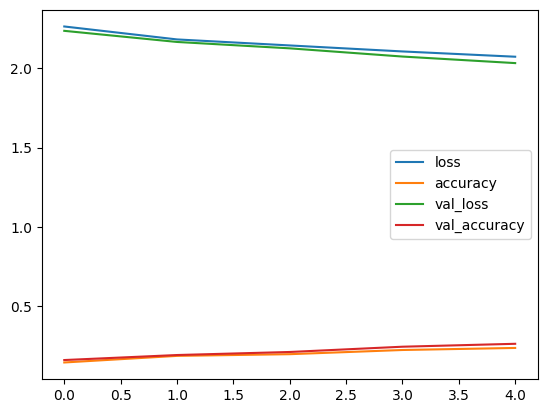

In [15]:
pd.DataFrame(history1.history).plot()


In [57]:
def plot_the_graph(hist):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Accuracy vs Val Accuracy")
  plt.plot(hist.history['accuracy'], label="accuracy")
  plt.plot(hist.history['val_accuracy'], label='val_accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.title('Loss vs Val Loss')
  plt.plot(hist.history['loss'], label="loss")
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.legend()


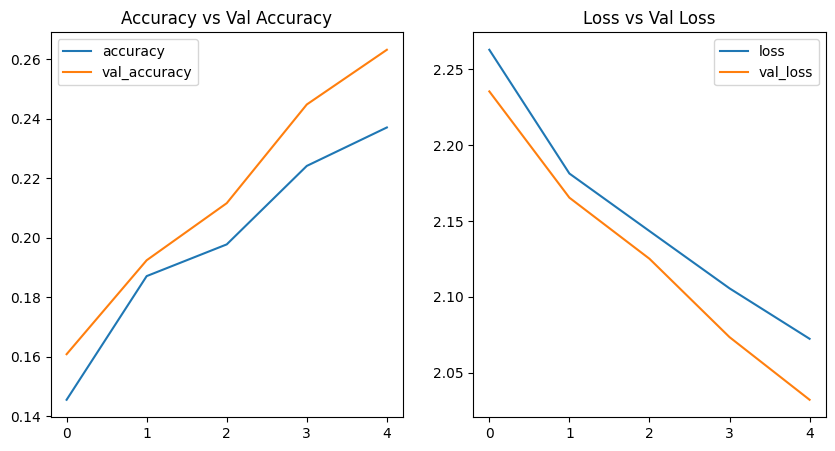

In [34]:
plot_the_graph(history1)

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [39]:
tf.random.set_seed(42)

model3 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
history3 = model3.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data)
           )

Epoch 1/5
235/235 [==============================] - 28s 114ms/step - loss: 2.1843 - accuracy: 0.2088 - val_loss: 1.9899 - val_accuracy: 0.2968
Epoch 2/5
235/235 [==============================] - 30s 130ms/step - loss: 1.8179 - accuracy: 0.3812 - val_loss: 1.8800 - val_accuracy: 0.3312
Epoch 3/5
235/235 [==============================] - 28s 117ms/step - loss: 1.4503 - accuracy: 0.5249 - val_loss: 2.0583 - val_accuracy: 0.3196
Epoch 4/5
235/235 [==============================] - 27s 114ms/step - loss: 0.9831 - accuracy: 0.6900 - val_loss: 2.1835 - val_accuracy: 0.3144
Epoch 5/5
235/235 [==============================] - 31s 133ms/step - loss: 0.5421 - accuracy: 0.8392 - val_loss: 2.7543 - val_accuracy: 0.2936


In [40]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 29160)             0         
                                                                 
 dense_4 (Dense)             (None, 10)               

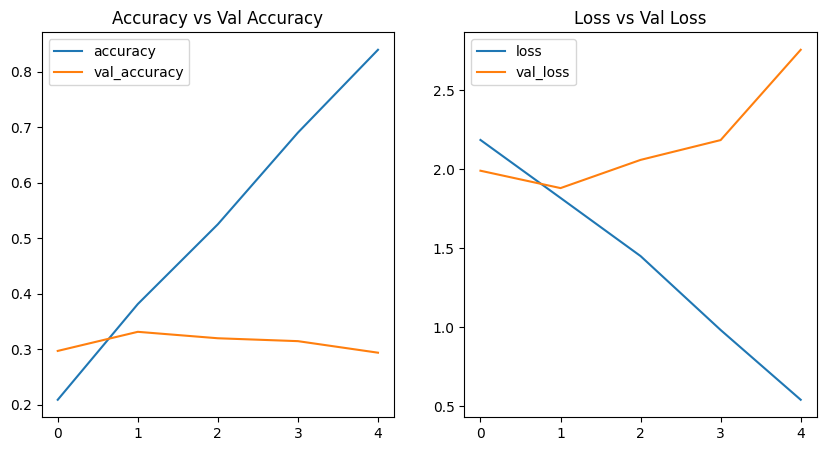

In [41]:
plot_the_graph(history3)

**Model is overfitting**

In [47]:
train_datagen = ImageDataGenerator(rescale=1/225.,
                                   shear_range=0.2,
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_augdata = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 seed=42,
                                                 batch_size=32,
                                                 class_mode = 'categorical')


Found 7500 images belonging to 10 classes.



## Model 2


In [48]:
tf.random.set_seed(42)

model2 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
history2 = model2.fit(train_augdata,
           epochs = 5,
           steps_per_epoch = len(train_augdata),
           validation_data = test_data,
           validation_steps = len(test_data)
           )

Epoch 1/5
235/235 [==============================] - 107s 446ms/step - loss: 2.3070 - accuracy: 0.1344 - val_loss: 2.2481 - val_accuracy: 0.1584
Epoch 2/5
235/235 [==============================] - 104s 443ms/step - loss: 2.2114 - accuracy: 0.1801 - val_loss: 2.1194 - val_accuracy: 0.2732
Epoch 3/5
235/235 [==============================] - 103s 440ms/step - loss: 2.1187 - accuracy: 0.2387 - val_loss: 1.9837 - val_accuracy: 0.2804
Epoch 4/5
235/235 [==============================] - 105s 447ms/step - loss: 2.0601 - accuracy: 0.2701 - val_loss: 1.9473 - val_accuracy: 0.3168
Epoch 5/5
235/235 [==============================] - 107s 454ms/step - loss: 1.9908 - accuracy: 0.2977 - val_loss: 1.9236 - val_accuracy: 0.3496


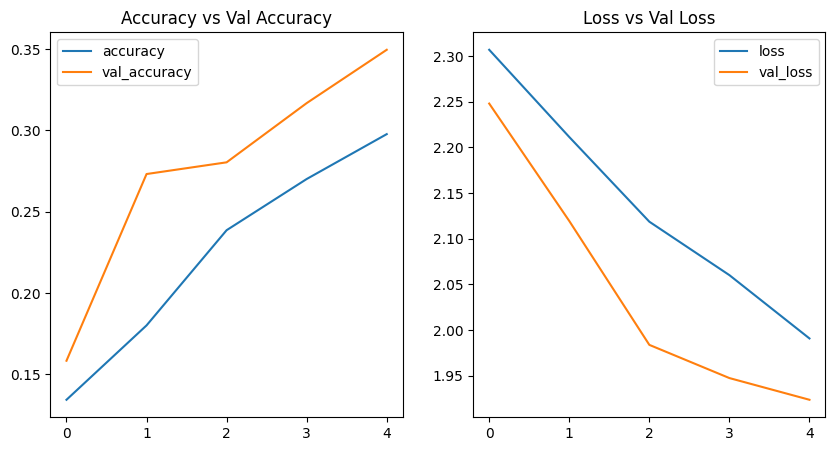

In [49]:
plot_the_graph(history2)

**Training Data is performing quite well. But The validation data is worse**

In [50]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_24 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

**This model is quite better than previous one**

  - Reduced Neural Network -> reducing overfitting
  - Perform better on high epochs


In [53]:
predict2 = model2.predict(test_data)

79/79 [==============================] - 7s 90ms/step


In [ ]:
def predict_plot(pred, img):
  '''
  Args:
    ----------------------------
    model,
    img
    ----------------------------
  '''



In [70]:

import random as rd

from PIL import Image
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  plt.imshow(img)
  return img

def predict_plot(model, path="10_food_classes_all_data/test/"):

  dir_choice  =  os.listdir(path)
  food_class = dir_choice[rd.randint(0,len(dir_choice))]
  path += food_class + "/"
  img_choice = os.listdir(path)
  path += img_choice[rd.randint(0,len(img_choice)-1)]
  samp_ = prepareData(path)
  samp = tf.expand_dims(samp_, axis=0)
  pred_ = int(tf.round(model.predict(samp).argmax()))
  pred_class = dir_choice[pred_]
  if pred_class == food_class:
    plt.title(f"{dir_choice[pred_]}", c='g')
  else:
    plt.title(f"{pred_class}", c='r')
  plt.imshow(samp_)


1/1 [==============================] - 0s 19ms/step


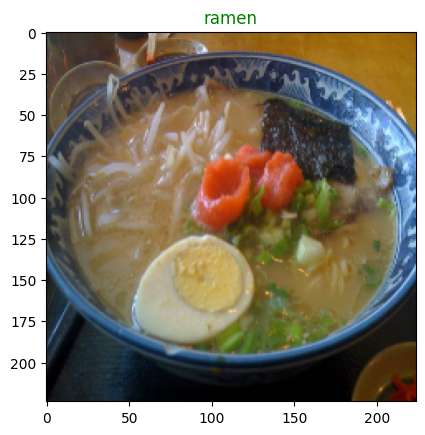

In [98]:
predict_plot(model2,path="10_food_classes_all_data/test/")

1/1 [==============================] - 0s 21ms/step


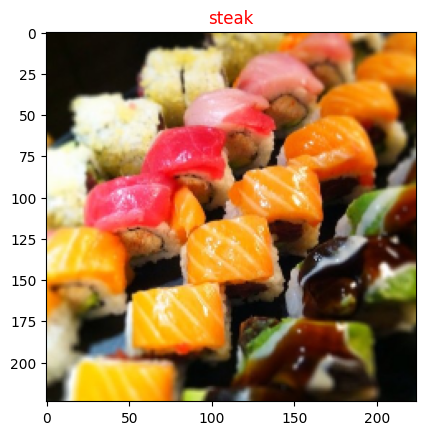

In [104]:
predict_plot(model2,path="10_food_classes_all_data/test/")

# **Transfer Learning**

In [10]:
import datetime

In [18]:
print(datetime.datetime.now())

2023-08-20 08:09:47.925000


In [20]:
!nvidia-smi

Sun Aug 20 08:10:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
train_data

In [63]:
train_data = ImageDataGenerator(rescale=1/255.,
                                shear_range=0.2,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                horizontal_flip=True,
                                zoom_range=0.2,
                                rotation_range=20)
train_data1 = ImageDataGenerator(rescale=1/255.)

test_data = ImageDataGenerator(rescale=1/255.)
train_data_aug = train_data.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                seed=42)

train_data_aug1 = train_data1.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                seed=42)

test_data_aug = test_data.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              seed=42)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [40]:
def create_callbacks(dir_name, exp_name):
    log_dir = dir_name + "/" + exp_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tens_callbacks = tf.keras.callbacks.TensorBoard(
        log_dir = "./logs"
    )
    print(f"Dumping the logs in {log_dir} ")
    return tens_callbacks

In [41]:
import tensorflow_hub as hub

In [42]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

In [43]:
efficientnet_url = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2'

## Model 4

###  Using Transfer Learning

In [52]:
model4 = Sequential([
    hub.KerasLayer(resnet_url,
    trainable=False,
    name ="feature_extractor_layer",
                   input_shape=(224,224,3)),
    Dense(len(np.array(class_names)), activation='softmax')
])



In [53]:
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [55]:
history4 = model4.fit(train_data_aug,
           epochs=5,
           steps_per_epoch=len(train_data_aug),
           validation_data= test_data_aug,
           validation_steps = len(test_data_aug),
           callbacks=create_callbacks("tensorflow_hub", "Resnet"))

Dumping the logs in tensorflow_hub/Resnet/20230820-085707 
Epoch 1/5
235/235 [==============================] - 115s 486ms/step - loss: 0.8871 - accuracy: 0.7157 - val_loss: 0.5497 - val_accuracy: 0.8160
Epoch 2/5
235/235 [==============================] - 113s 480ms/step - loss: 0.6920 - accuracy: 0.7751 - val_loss: 0.5033 - val_accuracy: 0.8280
Epoch 3/5
235/235 [==============================] - 114s 484ms/step - loss: 0.6229 - accuracy: 0.7940 - val_loss: 0.4539 - val_accuracy: 0.8480
Epoch 4/5
235/235 [==============================] - 114s 485ms/step - loss: 0.5906 - accuracy: 0.8060 - val_loss: 0.4463 - val_accuracy: 0.8528
Epoch 5/5
235/235 [==============================] - 114s 487ms/step - loss: 0.5511 - accuracy: 0.8183 - val_loss: 0.4589 - val_accuracy: 0.8452


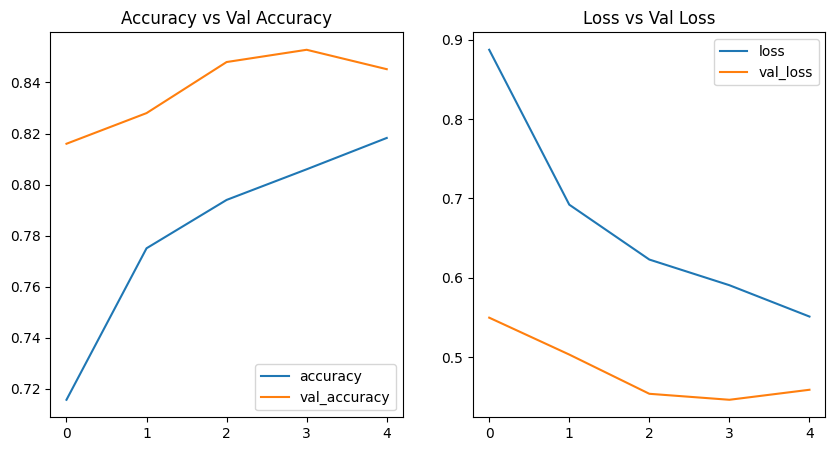

In [60]:
plot_the_graph(history4)

### Model 4 with non-augmented data

In [64]:
history5 = model4.fit(train_data_aug,
           epochs=5,
           steps_per_epoch=len(train_data_aug),
           validation_data= test_data_aug,
           validation_steps = len(test_data_aug),
           callbacks=create_callbacks("tensorflow_hub", "Resnet"))

Dumping the logs in tensorflow_hub/Resnet/20230820-091013 
Epoch 1/5
235/235 [==============================] - 118s 500ms/step - loss: 0.5169 - accuracy: 0.8212 - val_loss: 0.4651 - val_accuracy: 0.8468
Epoch 2/5
235/235 [==============================] - 114s 486ms/step - loss: 0.5122 - accuracy: 0.8272 - val_loss: 0.4565 - val_accuracy: 0.8464
Epoch 3/5
235/235 [==============================] - 113s 483ms/step - loss: 0.4919 - accuracy: 0.8340 - val_loss: 0.4456 - val_accuracy: 0.8560
Epoch 4/5
235/235 [==============================] - 112s 476ms/step - loss: 0.4844 - accuracy: 0.8336 - val_loss: 0.4502 - val_accuracy: 0.8536
Epoch 5/5
235/235 [==============================] - 111s 471ms/step - loss: 0.4601 - accuracy: 0.8452 - val_loss: 0.4347 - val_accuracy: 0.8612


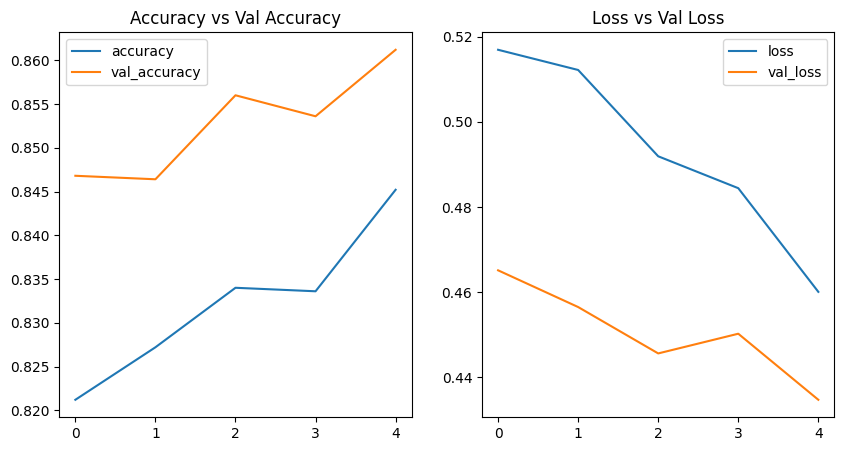

In [66]:
plot_the_graph(history5)

In [78]:

import random as rd

from PIL import Image
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  plt.imshow(img)
  return img

def predict_plot(model, path="10_food_classes_all_data/test/"):

  dir_choice  =  os.listdir(path)
  food_class = dir_choice[rd.randint(0,len(dir_choice))]
  path += food_class + "/"
  img_choice = os.listdir(path)
  path += img_choice[rd.randint(0,len(img_choice)-1)]
  samp_ = prepareData(path)
  samp = tf.expand_dims(samp_, axis=0)
  pred_ = int(tf.round(model.predict(samp).argmax()))
  pred_class = dir_choice[pred_]
  if pred_class == food_class:
    plt.title(f"{dir_choice[pred_]}", c='g')
  else:
    plt.title(f"{pred_class}", c='r')
  plt.imshow(samp_)
